In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import math
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Final Project

In [55]:
* For our final prjoect we wanted to measure the number of people who were Privately insured, Publically insured against those who were neither privately or publically insured. 

* Then we wanted to work our way towards predicting the number of people who were not 'UNINSURED'or were 'UNINSURED'.

* For those who counted as not having private or public insurance we counted the as being 'UNINSURED'. 

* We did a count for the privately insured and the publically insured and counted those who elected '2'or 'No' for both as 'Uninsured'

* We then created a new column in the DatatFrame from checking if 'PRIVHLTH' and 'PUBHLTH' columns had a value of 2, and then converted it to an integer type. of the subset

* We then filtered through the data to check counts on those who reported '1', so yes to being uninsured then we put this count against a list of income results for those that reported being either not privaately insured or publically insured. 

* The project then goes into detail with modelling the number of people that are Privately insured, publically insured and uninsured by percentages. 

* We then also highlight the income breakdown of the observations by percentages to get a better sense of the economic status of our observants. 

* Project then creates a subset of the specific variables we wanted to look at and thought that we needed to run tests and view regressions. 

* Then we continue to Run the regressions, followed by the predictions. 

* LOGIT regression & DTR regression with predictions. 


SyntaxError: ignored

In [4]:
DF = '/content/drive/MyDrive/DEMOFINAL/pulse2022_puf_48.csv'

In [5]:
data = pd.read_csv(DF)

In [6]:
data.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,...,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
0,V480000001,48,41,NaN,4,1411.203878,1261.919425,1946,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,2
1,V480000002,48,31,NaN,3,1021.299839,3735.204079,1958,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88
2,V480000003,48,17,16980.0,3,13111.143310,49438.385982,1971,2,2,...,-99,-99,-99,-99,-99,-99,-99,-99,1,1
3,V480000004,48,13,12060.0,2,2123.268644,10637.705782,1967,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,4
4,V480000005,48,33,NaN,1,343.061621,1357.461102,1977,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,2


In [7]:
### Create New Column in DataFrame

In [8]:
data['UNINSURED'] = (data['PRIVHLTH'] == 2) & (data['PUBHLTH'] == 2)
data['UNINSURED'] = data['UNINSURED'].astype(int)

In [9]:
### Percentage of 'PRIVHLTH', 'PUBHLTH', 'UNINSURED'

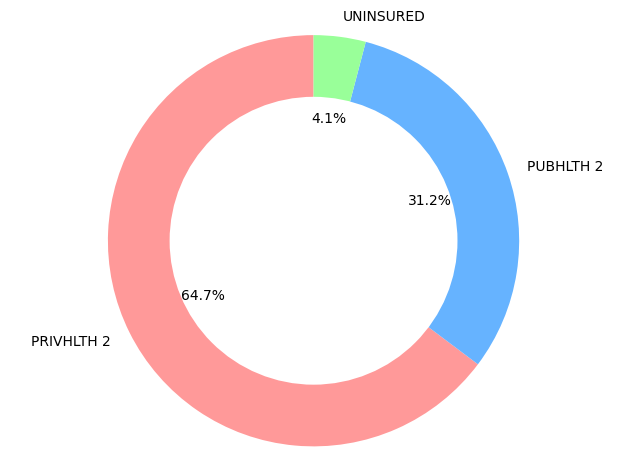

In [10]:
total_count = len(data)
percentage_privhlth_2 = (data['PRIVHLTH'] == 1).sum() / total_count * 100
percentage_pubhlth_2 = (data['PUBHLTH'] == 1).sum() / total_count * 100
percentage_uninsured = (data['UNINSURED'] == 1).sum() / total_count * 100


labels = ['PRIVHLTH 2', 'PUBHLTH 2', 'UNINSURED']
sizes = [percentage_privhlth_2, percentage_pubhlth_2, percentage_uninsured]
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [11]:
### Income groups broken down by category. 

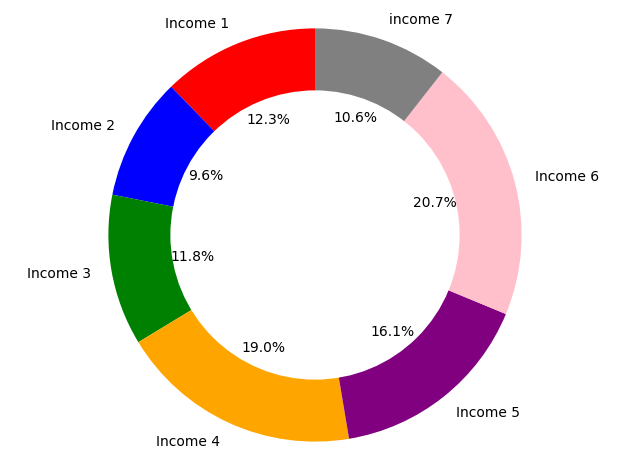

In [12]:
total_count = len(data)
income_categories = [1, 2, 3, 4, 5, 6, 7]
percentages = []

for category in income_categories:
    percentage = (data['INCOME'] == category).sum() / total_count * 100
    percentages.append(percentage)

labels = ['Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5', 'Income 6', 'income 7']
sizes = percentages
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'gray']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.tight_layout()
plt.show()

In [13]:
### Count per insurance category. 

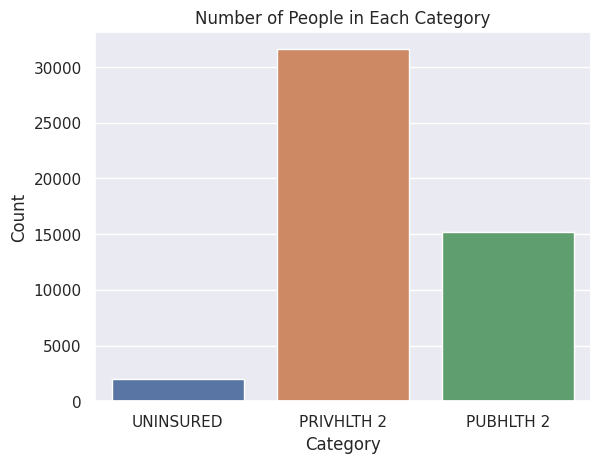

In [14]:
count_uninsured = data['UNINSURED'].sum()
count_privhlth_2 = (data['PRIVHLTH'] == 1).sum()
count_pubhlth_2 = (data['PUBHLTH'] == 1).sum()

sns.set(style="darkgrid")
sns.barplot(x=["UNINSURED", "PRIVHLTH 2", "PUBHLTH 2"], y=[count_uninsured, count_privhlth_2, count_pubhlth_2], palette="deep")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Number of People in Each Category")
plt.show()

In [15]:
### Subset our UNINSURED column with the income column to view income grouping with the UNINSURED.

In [16]:
test_data = data.loc[:, ['INCOME', 'UNINSURED']]

In [17]:
print(test_data.head(10))

   INCOME  UNINSURED
0       2          0
1     -88          0
2       1          1
3       4          0
4       2          0
5       4          0
6       2          0
7       5          0
8       6          0
9       8          0


In [18]:
uninsured_data = test_data[test_data['UNINSURED'] == 1]
print(uninsured_data)
print(len(uninsured_data))



       INCOME  UNINSURED
2           1          1
103         2          1
129         1          1
169       -88          1
201         5          1
...       ...        ...
46720       3          1
46754       4          1
46770       2          1
46780       2          1
46794       3          1

[1993 rows x 2 columns]
1993


In [19]:
### Drop NA values within the income category.

In [23]:
test_data.drop(test_data[(test_data['INCOME']==-99) | (test_data['INCOME']==-88)].index)
uninsured_data = test_data[test_data['UNINSURED'] == 1]
print(uninsured_data)
print(len(uninsured_data))



       INCOME  UNINSURED
2           1          1
103         2          1
129         1          1
169       -88          1
201         5          1
...       ...        ...
46720       3          1
46754       4          1
46770       2          1
46780       2          1
46794       3          1

[1993 rows x 2 columns]
1993


In [24]:
data = data.drop(data[(data['SEXUAL_ORIENTATION']==-99) | (data['SEXUAL_ORIENTATION']==-88)].index)
data = data.drop(data[(data['INCOME']==-99) | (data['INCOME']==-88)].index)
data = data.drop(data[(data['WRKLOSSRV']==-99) | (data['WRKLOSSRV']==-88)].index)
data = data.drop(data[(data['ANYWORK']==-99) | (data['ANYWORK']==-88)].index)


In [ ]:
### Subset data for necessary variables. 


In [25]:
# data['UNINSURED'] = (data['PRIVHLTH'] == 2) & (data['PUBHLTH'] == 2)
# data['UNINSURED'] = data['UNINSURED'].astype(int)
data['EST_AGE'] = 2022 - data['TBIRTH_YEAR']
data['EST_AGE^2'] = data['TBIRTH_YEAR']**2
data['HISP'] = (data['RHISPANIC'] == 2)
data['HISP'] = data['HISP'].astype(int)
data['BLACK'] = (data['RRACE'] == 2)
data['BLACK'] = data['BLACK'].astype(int)
data['ASIAN'] = (data['RRACE'] == 3)
data['ASIAN'] = data['ASIAN'].astype(int)
data['HS_DEGREE'] = (data['EEDUC'] == 3)
data['HS_DEGREE'] = data['HS_DEGREE'].astype(int)
data['SOME_COLLEGE'] = (data['EEDUC'] == 4)
data['SOME_COLLEGE'] = data['SOME_COLLEGE'].astype(int)
data['ASS_DEGREE'] = (data['EEDUC'] == 5)
data['ASS_DEGREE'] = data['ASS_DEGREE'].astype(int)
data['BACH_DEGREE'] = (data['EEDUC'] == 6)
data['BACH_DEGREE'] = data['BACH_DEGREE'].astype(int)
data['GRAD_DEGREE'] = (data['EEDUC'] == 7)
data['GRAD_DEGREE'] = data['GRAD_DEGREE'].astype(int)
data['FEMALE'] = (data['EGENID_BIRTH'] == 2)
data['FEMALE'] = data['FEMALE'].astype(int)
data['SEBASTIAN'] = (data['SEXUAL_ORIENTATION'] == 1)
data['SEBASTIAN'] = data['SEBASTIAN'].astype(int)
data['SEBASTIAN2'] = (data['SEXUAL_ORIENTATION'] == 3)
data['SEBASTIAN2'] = data['SEBASTIAN2'].astype(int)
data['WORKLOSS'] = (data['WRKLOSSRV'] == 1)
data['WORKLOSS'] = data['WORKLOSS'].astype(int)
data['NOWORK'] = (data['ANYWORK'] == 2)
data['NOWORK'] = data['NOWORK'].astype(int)
data['HRATIO'] = (data['THHLD_NUMKID'] + 1) / (data['THHLD_NUMADLT'] + 1)
data['GOVEMP'] = (data['KINDWORK'] == 1)
data['GOVEMP'] = data['GOVEMP'].astype(int)
data['PRIVEMP'] = (data['KINDWORK'] == 2) | (data['KINDWORK'] == 5)
data['PRIVEMP'] = data['PRIVEMP'].astype(int)
data['SELFEMP'] = (data['KINDWORK'] == 4)
data['SELFEMP'] = data['SELFEMP'].astype(int)
data['CHAREMP'] = (data['KINDWORK'] == 3)
data['CHAREMP'] = data['CHAREMP'].astype(int)
data['MARRIED'] = (data['MS'] == 1)
data['MARRIED'] = data['MARRIED'].astype(int)
data['NEVERMAR'] = (data['MS'] == 5)
data['NEVERMAR'] = data['NEVERMAR'].astype(int)
data['COVIDVAC'] = (data['RECVDVACC'] == 1)
data['COVIDVAC'] = data['COVIDVAC'].astype(int)
data['DOSES'] = (data['NUMDOSES'] == 2) | (data['NUMDOSES'] == 3) | (data['NUMDOSES'] == 4)
data['DOSES'] = data['DOSES'].astype(int)

In [26]:
data2 = data.loc[:, ['UNINSURED', 'INCOME', 'EST_AGE', 'EST_AGE^2', 'HISP', 'BLACK', 'ASIAN', 'FEMALE', 'HS_DEGREE', 'SOME_COLLEGE', 'ASS_DEGREE', 'BACH_DEGREE', 'GRAD_DEGREE', 'SEBASTIAN', 'SEBASTIAN2', 'WORKLOSS', 'NOWORK', 'HRATIO', 'THHLD_NUMPER', 'GOVEMP', 'PRIVEMP', 'SELFEMP', 'CHAREMP', 'MARRIED', 'NEVERMAR', 'COVIDVAC', 'DOSES']]


In [27]:
data2.head(95)

,UNINSURED,INCOME,EST_AGE,EST_AGE^2,HISP,BLACK,ASIAN,FEMALE,HS_DEGREE,SOME_COLLEGE,...,HRATIO,THHLD_NUMPER,GOVEMP,PRIVEMP,SELFEMP,CHAREMP,MARRIED,NEVERMAR,COVIDVAC,DOSES
0,0,2,76,3786916,0,0,0,1,0,0,...,0.500000,1,0,0,0,0,0,0,1,1
2,1,1,51,3884841,1,0,0,1,1,0,...,0.600000,6,0,0,0,0,0,0,1,0
3,0,4,55,3869089,0,1,0,1,0,0,...,0.333333,6,1,0,0,0,0,0,1,1
4,0,2,45,3908529,0,0,0,1,0,0,...,0.400000,5,0,0,1,0,0,0,1,0
5,0,4,28,3976036,0,0,0,1,0,0,...,0.500000,1,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,7,33,3956121,0,0,0,1,0,0,...,0.333333,2,0,0,1,0,1,0,1,0
110,0,7,39,3932289,0,0,1,1,0,0,...,0.333333,2,0,1,0,0,1,0,1,1
111,0,2,67,3822025,0,0,0,1,1,0,...,0.250000,3,0,0,0,0,1,0,1,0
112,0,8,48,3896676,0,0,0,0,0,0,...,1.000000,4,0,1,0,0,1,0,1,1


In [ ]:
### Logit tables and Regressions. 

In [28]:
logit = smf.logit('UNINSURED ~ INCOME + EST_AGE + EST_AGE^2 + HISP + BLACK + ASIAN + FEMALE + SOME_COLLEGE + ASS_DEGREE + BACH_DEGREE + GRAD_DEGREE + SEBASTIAN + SEBASTIAN2 + WORKLOSS + NOWORK + HRATIO + THHLD_NUMPER + GOVEMP + PRIVEMP + SELFEMP + MARRIED + NEVERMAR + COVIDVAC', data=data2).fit()

Optimization terminated successfully.
         Current function value: 0.160007
         Iterations 8


In [29]:
print(logit.summary().tables[1])

                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4146      0.200      2.077      0.038       0.023       0.806
INCOME          -0.2094      0.016    -13.325      0.000      -0.240      -0.179
EST_AGE         -0.0414      0.013     -3.171      0.002      -0.067      -0.016
EST_AGE ^ 2      0.0041      0.013      0.317      0.751      -0.021       0.029
HISP             0.3576      0.076      4.689      0.000       0.208       0.507
BLACK            0.0907      0.091      1.001      0.317      -0.087       0.268
ASIAN           -0.0697      0.139     -0.502      0.615      -0.342       0.202
FEMALE          -0.2768      0.054     -5.126      0.000      -0.383      -0.171
SOME_COLLEGE    -0.1166      0.072     -1.614      0.106      -0.258       0.025
ASS_DEGREE      -0.1920      0.091     -2.102      0.036      -0.371      -0.013
BACH_DEGREE     -0.4374     

In [30]:
eq1 = 'UNINSURED ~ INCOME + EST_AGE + EST_AGE^2 + HISP + BLACK + ASIAN + FEMALE + HS_DEGREE + SOME_COLLEGE + ASS_DEGREE + BACH_DEGREE + GRAD_DEGREE + SEBASTIAN + SEBASTIAN2 + WORKLOSS + NOWORK + HRATIO + THHLD_NUMPER + GOVEMP + PRIVEMP + SELFEMP + CHAREMP + MARRIED + NEVERMAR + COVIDVAC + DOSES'

In [31]:
data2['probabilities'] = logit.predict().round(3)

In [32]:
data2[['UNINSURED', 'probabilities']].sample(20, random_state=101)

,UNINSURED,probabilities
35292,0,0.013
33223,0,0.008
34432,0,0.010
37933,0,0.012
20566,0,0.010
27635,1,0.049
18171,1,0.355
31899,0,0.409
20984,0,0.017
6119,0,0.014


In [33]:
data2['predictions'] = [1 if i >= 0.05 else 0 for i in data2['probabilities']]

In [34]:
pd.crosstab(data['UNINSURED'], data2['predictions'], margins = True)

predictions,0,1,All
UNINSURED,,,
0,26485,8737,35222
1,455,1298,1753
All,26940,10035,36975


In [35]:
sensitivity = 2004/2785
specitivity = 44455/58263
print(specitivity)
print(sensitivity)

0.7630056811355406
0.7195691202872532


In [36]:
y = data2['UNINSURED']

In [37]:
x = data2[['INCOME', 'EST_AGE', 'EST_AGE^2', 'HISP', 'BLACK', 'ASIAN', 'FEMALE', 'SOME_COLLEGE', 'ASS_DEGREE', 'BACH_DEGREE', 'GRAD_DEGREE', 'SEBASTIAN', 'SEBASTIAN2', 'WORKLOSS', 'NOWORK', 'HRATIO', 'THHLD_NUMPER', 'GOVEMP', 'PRIVEMP', 'SELFEMP', 'MARRIED', 'NEVERMAR', 'COVIDVAC']]

In [38]:
dtr= tree.DecisionTreeRegressor(max_depth= 5).fit(x,y)

In [39]:
data2['dtr_pr']= dtr.predict(x)

In [40]:
data2[['UNINSURED', 'dtr_pr']].sample(20, random_state=101)

,UNINSURED,dtr_pr
35292,0,0.006627
33223,0,0.006627
34432,0,0.007641
37933,0,0.007641
20566,0,0.007641
27635,1,0.069009
18171,1,0.331429
31899,0,0.182927
20984,0,0.006627
6119,0,0.007641


In [41]:
data2['predictions2'] = [1 if i >= 0.05 else 0 for i in data2['dtr_pr']]

In [42]:
pd.crosstab(data['UNINSURED'], data2['predictions2'], margins = True)

predictions2,0,1,All
UNINSURED,,,
0,22163,13059,35222
1,251,1502,1753
All,22414,14561,36975


In [43]:
sensitivity = 1961/2785
specitivity = 44407/58263
print(specitivity)
print(sensitivity)

0.762181830664401
0.704129263913824
